### Generación y adecuación de datos sintéticos
* Generación de datos
* Visualización
* Codificación de la salida en one-hot
* Separación de los conjuntos de training y test

Todo utilizando la librería ScikitLearn


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets as skds


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X, y = skds.make_classification(n_samples=4000,
   n_features=2,
   n_informative=2, 
   n_redundant=0,  
   n_repeated=0, 
   n_classes=2,
   n_clusters_per_class=1)
print(y[1:6])

[1 1 1 1 1]


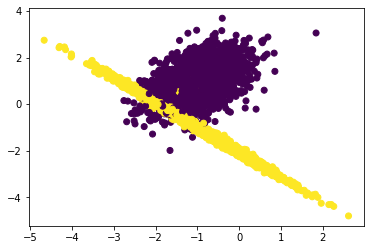

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

In [5]:
print(y[1:6])
import numpy as np
y=np.eye(2)[y]
print(y[1:6])

[1 1 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X, y,test_size=0.20, random_state=17))

print("X_train :", X_train[1:4])
print("y_train :", y_train[1:4])

print("X_test :",X_test[1:4])
print("y_test :",y_test[1:4])

X_train : [[-0.69574958 -0.10377889]
 [ 0.19452429  0.77112608]
 [-1.41084007 -0.63180211]]
y_train : [[1. 0.]
 [1. 0.]
 [0. 1.]]
X_test : [[-1.53800186  0.64345347]
 [-2.25679023  0.30420963]
 [-1.69381314  0.96775534]]
y_test : [[1. 0.]
 [1. 0.]
 [1. 0.]]


### Definiendo variables y parámetros necesarios

Tenemos la función que necesitamos entrenar es: y = wx + b

Para ello vamos a definir todas las variables necesarias como las entradas


   

In [7]:
nIn = X_train.shape[1]
nOut = y_train.shape[1]
print(nIn)
print(nOut)

2
2


In [8]:
tasa_apren = 0.003
tasa_apren


0.003

In [9]:
mix = tf.placeholder(dtype=tf.float32, shape=[None, nIn])
miy = tf.placeholder(dtype=tf.float32, shape=[None, nOut])

w = tf.Variable(tf.zeros([nIn,nOut]), dtype=tf.float32)
b = tf.Variable(tf.zeros([nOut]), dtype=tf.float32)

b[1:3]

<tf.Tensor 'strided_slice:0' shape=(1,) dtype=float32>

###  Definimos el modelo y las funciones de pérdida y optimización
![alt text](modelo.png "modelo")  
 Debemos construir el modelo, para ello montaremos
 * Su definición
 * Funciones de pérdida 

Esto afecta a nuestra función de pérdida complicándola un poco más 
![alt text](imagename.png "formula")

 * Función de optimización


In [10]:
model = tf.nn.sigmoid(tf.matmul(mix,w)+b)

In [11]:
y_tra = tf.constant([6,2,4,2,2,5,5,2] , dtype=tf.float32)
y_ten = tf.constant([5,2,4,1,1,4,6,2], dtype=tf.float32)
sq = tf.square(y_tra - y_ten)
loss = tf.reduce_mean(sq)
sess = tf.Session()
sess.run(loss)



0.625

In [12]:
y_mean = tf.reduce_mean(y_ten)
total_error = tf.reduce_sum(tf.square(y_ten - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_ten - y_tra))
rs = 1 - tf.div(unexplained_error, total_error) 
sess = tf.Session() 
sess.run(rs)


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


0.79899496

In [13]:
loss = tf.reduce_mean(-tf.reduce_sum( (miy * tf.log(model)) + ((1 - miy) * tf.log(1 - model)), axis=1))


In [14]:
opt = tf.train.GradientDescentOptimizer(learning_rate=tasa_apren).minimize(loss)


## Entrenando el modelo

 Para entrenar nuestro modelo
 
 * Inicializar variables
 * Calcular la funcion de optimización
 * Calcular predicciones

In [15]:
sess =tf.Session()

In [16]:
sess.run(tf.global_variables_initializer())
res = sess.run(opt, feed_dict={mix: X_train, miy: y_train})

In [17]:
y_ori = sess.run(tf.argmax(miy,1), feed_dict = {miy:y_test})
y_pred = sess.run(tf.argmax(model,1), feed_dict = {mix:X_test})

In [18]:
bi = sess.run(b, feed_dict = {mix:X_train, miy: y_train})
wi = sess.run(w, feed_dict = {mix:X_train, miy: y_train})

print("Nuestro modelo tiene una pinta y=",wi[1,1],"*x +",bi[1])

Nuestro modelo tiene una pinta y= -0.0014601914 *x + -1.2187501e-05


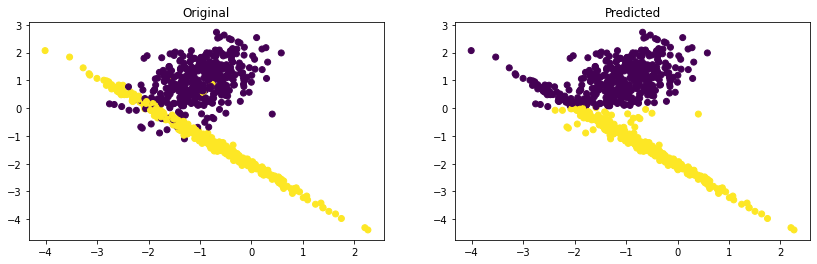

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_ori)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred)
plt.title('Predicted')
plt.show()


## Matriz de confusión   



|         X  | X  | Verdad         | Verdad         |
|------------|---|----------------|----------------|
|            |   | +              | -              |
| Predicción | + | true positive  | false positive |
| Predicción | - | false negative | true negative  |

In [20]:
tp = tf.metrics.true_positives(y_pred, y_ori)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(tp)
    print(a[0])

338.0


In [21]:
tn = tf.metrics.true_negatives(y_pred, y_ori)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(tp)
    print(a[0])

338.0


In [22]:
fp = tf.metrics.false_positives(y_pred, y_ori)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(tp)
    print(a[0])

338.0


In [23]:
fn = tf.metrics.false_negatives(y_pred, y_ori)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(tp)
    print(a[0])

338.0


In [24]:
mc = tf.math.confusion_matrix(y_ori, y_pred)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(mc)
    print(a)

[[350  34]
 [ 78 338]]


In [25]:
tn = 335
tp = 391
fn = 51
fp = 23


## Precisión y recall


* Accuracy (ACC) = Σ True positive + Σ True negative/Σ Total population


* Positive predictive value (PPV), Precision = Σ True positive/Σ Predicted condition positive

 
* Recall = Σ True positive/Σ Condition positive


* Nomenclatura de variables: 

    tp = True positive 
    
    tn = True negative
    
    fp = False positive
    
    fn = False negative


In [26]:
trues = tf.add(tp, tn)
falses = tf.add(fp,fn)
total = tf.add(trues, falses)
totalp = tf.add(tp,fp)
totaltp = tf.add(tp,fn)


In [27]:
#Accuracy (ACC) = Σ True positive + Σ True negative/Σ Total population
acc = tf.divide(tp ,totalp) 
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(acc)
    print("Accuracy ", a[0])


IndexError: invalid index to scalar variable.

In [29]:
#Positive predictive value (PPV), Precision = Σ True positive/Σ Predicted condition positive
precision = tf.divide(tp ,totaltp)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(precision)
    print("Precision ", a[0])


IndexError: invalid index to scalar variable.

In [30]:
# Recall = Σ True positive/Σ Condition positivetotalp
recall = tf.divide(trues, total)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a = sess.run(recall)
    print("recall ", a[0])


IndexError: invalid index to scalar variable.

In [31]:
acc = tf.metrics.accuracy(y_ori, y_pred)
precision = tf.metrics.precision(y_ori, y_pred)
recall = tf.metrics.recall(y_ori, y_pred)

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    a  = sess.run([recall,precision, acc])
    print("Recall2 ", a[2][1])
    print("Precision2 ", a[1][1])
    print("Accuracy2 ", a[0][1])



Recall2  0.86
Precision2  0.9086022
Accuracy2  0.8125


# TEMA 8 Curva ROC


In [32]:
roc = tf.metrics.auc(y_ori, y_pred)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    c = sess.run(roc)
    print(c)
import matplotlib.pyplot as plt


Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
(348000000.0, 0.8619791)


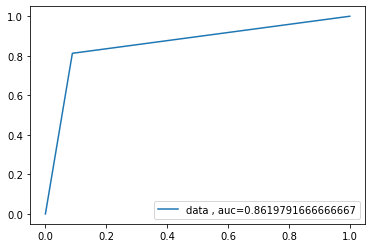

In [33]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_ori,  y_pred)
auc = metrics.roc_auc_score(y_ori, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()
